# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime as dt  

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low = -90, high = 90, size=1500)
lngs = np.random.uniform(low = -180, high = 180, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# cities

639

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
count = 0
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

print(f"Beginning Data Retrieval")
print(f"------------------------------")
for city in cities:
        url = (f'https://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={weather_api_key}')
#         print(url)
        weather_response = requests.get(url)
        weather_json = weather_response.json()
#         print(weather_json)
        try: 
            Cloudiness.append(weather_json['clouds']["all"])
            Country.append(weather_json['sys']["country"])
            Date.append(weather_json["dt"])
            Humidity.append(weather_json["main"]['humidity'])
            Lat.append(weather_json["coord"]['lat'])
            Lng.append(weather_json["coord"]['lon'])
            Max_Temp.append(weather_json["main"]['temp_max'])
            Wind_Speed.append(weather_json["wind"]['speed'])
            print( "Requesting " , count,"......" ,city)
            count = count + 1
            
        except KeyError:
        
            Cloudiness.append("")
            Country.append("")
            Date.append("")
            Humidity.append("")
            Lat.append("")
            Lng.append("")
            Max_Temp.append("")
            Wind_Speed.append("")
            print("Requesting " , count,"......" ,city, ".....Empty value, try again...")
            count = count + 1

Beginning Data Retrieval
------------------------------
Requesting  0 ...... rikitea
Requesting  1 ...... bredasdorp
Requesting  2 ...... bluff
Requesting  3 ...... butaritari
Requesting  4 ...... mecca
Requesting  5 ...... vaini
Requesting  6 ...... thompson
Requesting  7 ...... talcahuano
Requesting  8 ...... nevsehir
Requesting  9 ...... khatanga
Requesting  10 ...... belushya guba .....Empty value, try again...
Requesting  11 ...... bandarbeyla
Requesting  12 ...... hilo
Requesting  13 ...... busselton
Requesting  14 ...... amazar
Requesting  15 ...... moville
Requesting  16 ...... tabuk
Requesting  17 ...... mahebourg
Requesting  18 ...... barentsburg .....Empty value, try again...
Requesting  19 ...... camocim
Requesting  20 ...... kodiak
Requesting  21 ...... puerto ayora
Requesting  22 ...... flin flon
Requesting  23 ...... hithadhoo
Requesting  24 ...... ushuaia
Requesting  25 ...... punta arenas
Requesting  26 ...... sentyabrskiy .....Empty value, try again...
Requesting  27 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#display the data frame
cities_df = pd.DataFrame({
                            "City" : cities, 
                            "Cloudiness" : Cloudiness,
                            "Country" : Country, 
                            "Date" : Date,
                            "Humidity" : Humidity, 
                            "Lat" : Lat,
                            "Lng" : Lng,
                            "Max_Temp" : Max_Temp,
                            "Wind_Speed" : Wind_Speed
                        })
cities_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,rikitea,85,PF,1595258006,57,-23.12,-134.97,68.47,13.09
1,bredasdorp,0,ZA,1595258006,77,-34.53,20.04,62.6,6.93
2,bluff,100,NZ,1595257969,83,-46.6,168.33,39,3
3,butaritari,99,KI,1595257715,67,3.07,172.79,82.76,7.67
4,mecca,30,SA,1595257796,33,21.43,39.83,94.89,6.85
...,...,...,...,...,...,...,...,...,...
634,novosokolniki,100,RU,1595258143,62,56.35,30.16,72.88,3.87
635,homer,75,US,1595258143,100,59.64,-151.55,55.99,2.64
636,ystad,19,SE,1595258144,48,55.43,13.82,66.2,17.22
637,weyburn,100,CA,1595258144,85,49.67,-103.85,61,7.09


In [6]:
#save the file into a CSV file in the Resources Folder
cities_df.to_csv("Resources/cities.csv", encoding="utf-8", index=False)

In [7]:
#Replace the emppty values with Nan=N, then clean the data frame from the NaN values
nan_value = float("NaN")
cities_df.replace("", nan_value, inplace = True)
cities_df.dropna(subset = ["Cloudiness"], inplace = True)
cities_df.dropna(subset = ["Country"], inplace = True)
cities_df.dropna(subset = ["Date"], inplace = True)
cities_df.dropna(subset = ["Humidity"], inplace = True)
cities_df.dropna(subset = ["Lat"], inplace = True)
cities_df.dropna(subset = ["Lng"], inplace = True)
cities_df.dropna(subset = ["Max_Temp"], inplace = True)
cities_df.dropna(subset = ["Wind_Speed"], inplace = True)
clean_city_data_df = cities_df
clean_city_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,rikitea,85.0,PF,1.595258e+09,57.0,-23.12,-134.97,68.47,13.09
1,bredasdorp,0.0,ZA,1.595258e+09,77.0,-34.53,20.04,62.60,6.93
2,bluff,100.0,NZ,1.595258e+09,83.0,-46.60,168.33,39.00,3.00
3,butaritari,99.0,KI,1.595258e+09,67.0,3.07,172.79,82.76,7.67
4,mecca,30.0,SA,1.595258e+09,33.0,21.43,39.83,94.89,6.85
...,...,...,...,...,...,...,...,...,...
634,novosokolniki,100.0,RU,1.595258e+09,62.0,56.35,30.16,72.88,3.87
635,homer,75.0,US,1.595258e+09,100.0,59.64,-151.55,55.99,2.64
636,ystad,19.0,SE,1.595258e+09,48.0,55.43,13.82,66.20,17.22
637,weyburn,100.0,CA,1.595258e+09,85.0,49.67,-103.85,61.00,7.09


In [8]:
clean_city_data_df.count()

City          584
Cloudiness    584
Country       584
Date          584
Humidity      584
Lat           584
Lng           584
Max_Temp      584
Wind_Speed    584
dtype: int64

In [10]:
#Save the new clean file in the same folder as the other file
clean_city_data_df.to_csv("Resources/clean_cities.csv", encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
clean_city_data_hum_df = clean_city_data_df[clean_city_data_df["Humidity"]>100]
clean_city_data_hum_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed


There are no cities with Humidity higher tham 100, so we proceed to next step

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

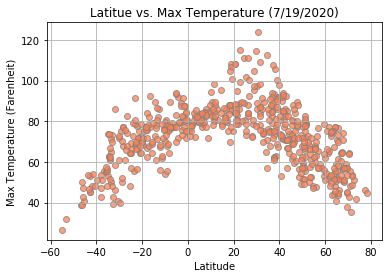

In [14]:
lat = clean_city_data_df ["Lat"]
temp = clean_city_data_df ["Max_Temp"]

plt.scatter(lat, temp,color="coral", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Farenheit)")
plt.title("Latitue vs. Max Temperature (7/19/2020)")
plt.grid()

plt.savefig("Figures/Plot_Lat_vs_Temp.png")
plt.show()

## Latitude vs. Humidity Plot

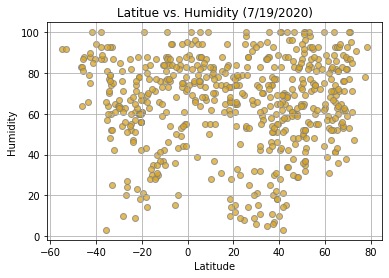

In [15]:
lat = clean_city_data_df ["Lat"]
hum = clean_city_data_df ["Humidity"]

plt.scatter(lat, hum,color="goldenrod", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitue vs. Humidity (7/19/2020)")
plt.grid()

plt.savefig("Figures/Plot_Lat_vs_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

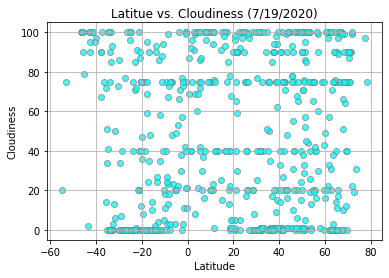

In [16]:
lat = clean_city_data_df ["Lat"]
cloud = clean_city_data_df ["Cloudiness"]

plt.scatter(lat, cloud,color="aqua", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitue vs. Cloudiness (7/19/2020)")
plt.grid()

plt.savefig("Figures/Plot_Lat_vs_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

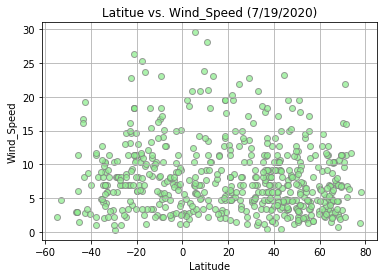

In [17]:
lat = clean_city_data_df ["Lat"]
wind = clean_city_data_df ["Wind_Speed"]

plt.scatter(lat, wind,color="lightgreen", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed")
plt.title("Latitue vs. Wind_Speed (7/19/2020)")
plt.grid()

plt.savefig("Figures/Plot_Lat_vs_WindSpeed.png")
plt.show()

## Linear Regression

In [18]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = clean_city_data_df[clean_city_data_df["Lat"]>0]
northern_hemisphere_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
3,butaritari,99.0,KI,1.595258e+09,67.0,3.07,172.79,82.76,7.67
4,mecca,30.0,SA,1.595258e+09,33.0,21.43,39.83,94.89,6.85
6,thompson,40.0,CA,1.595258e+09,60.0,55.74,-97.86,68.00,3.36
8,nevsehir,20.0,TR,1.595258e+09,18.0,38.92,34.67,100.40,12.75
9,khatanga,22.0,RU,1.595258e+09,71.0,71.97,102.50,53.58,6.73
...,...,...,...,...,...,...,...,...,...
634,novosokolniki,100.0,RU,1.595258e+09,62.0,56.35,30.16,72.88,3.87
635,homer,75.0,US,1.595258e+09,100.0,59.64,-151.55,55.99,2.64
636,ystad,19.0,SE,1.595258e+09,48.0,55.43,13.82,66.20,17.22
637,weyburn,100.0,CA,1.595258e+09,85.0,49.67,-103.85,61.00,7.09


In [19]:
southern_hemisphere_df = clean_city_data_df[clean_city_data_df["Lat"]<0]
southern_hemisphere_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,rikitea,85.0,PF,1.595258e+09,57.0,-23.12,-134.97,68.47,13.09
1,bredasdorp,0.0,ZA,1.595258e+09,77.0,-34.53,20.04,62.60,6.93
2,bluff,100.0,NZ,1.595258e+09,83.0,-46.60,168.33,39.00,3.00
5,vaini,40.0,TO,1.595258e+09,78.0,-21.20,-175.20,71.60,11.41
7,talcahuano,75.0,CL,1.595258e+09,87.0,-36.72,-73.12,55.40,8.05
...,...,...,...,...,...,...,...,...,...
609,plettenberg bay,0.0,ZA,1.595258e+09,79.0,-34.05,23.37,62.60,3.85
611,galesong,20.0,ID,1.595258e+09,83.0,-5.32,119.37,77.00,4.70
626,diamantino,0.0,BR,1.595258e+09,28.0,-14.41,-56.45,89.28,8.63
628,waingapu,0.0,ID,1.595258e+09,81.0,-9.66,120.26,73.49,8.21


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

 R-squared is 0.42611907001035537


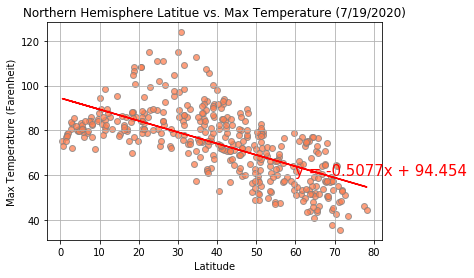

In [20]:
n_lat = northern_hemisphere_df ["Lat"]
n_temp = northern_hemisphere_df ["Max_Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_temp)
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.scatter(n_lat, n_temp,color="coral", edgecolors="grey", alpha=0.75)
plt.plot(n_lat,regress_values,"r-")
plt.annotate(line_eq,(60,60), fontsize = 15, color = "red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Farenheit)")
plt.title("Northern Hemisphere Latitue vs. Max Temperature (7/19/2020)")

plt.grid()

print(f" R-squared is {rvalue**2}")
plt.savefig("Figures/Regression_North_Lat_vs_Temperature.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

 R-squared is 0.5645706981905904


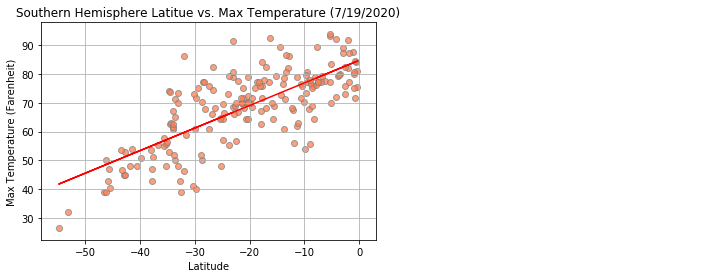

In [21]:
s_lat = southern_hemisphere_df ["Lat"]
s_temp = southern_hemisphere_df ["Max_Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_temp)
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(s_lat,regress_values,"r-")
plt.annotate(line_eq,(30,30), fontsize = 15, color = "red")

plt.scatter(s_lat, s_temp,color="coral", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Farenheit)")
plt.title("Southern Hemisphere Latitue vs. Max Temperature (7/19/2020)")
plt.grid()
print(f" R-squared is {rvalue**2}")

plt.savefig("Figures/Regression_South_Lat_vs_Temperature.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 R-squared is 0.0009499049463685899


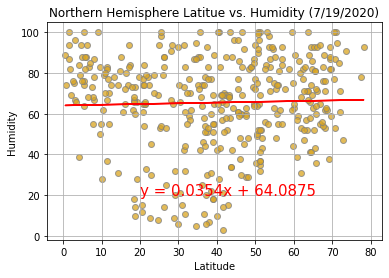

In [22]:
n_lat = northern_hemisphere_df ["Lat"]
n_hum = northern_hemisphere_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_hum)
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(n_lat,regress_values,"r-")
plt.annotate(line_eq,(20,20), fontsize = 15, color = "red")

plt.scatter(n_lat, n_hum,color="goldenrod", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere Latitue vs. Humidity (7/19/2020)")
plt.grid()

print(f" R-squared is {rvalue**2}")
plt.savefig("Figures/Regression_North_Lat_vs_Humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 R-squared is 0.024191107390132596


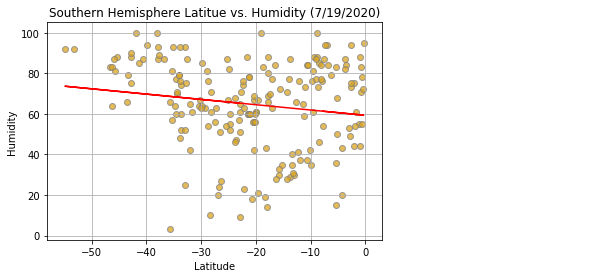

In [23]:
s_lat = southern_hemisphere_df ["Lat"]
s_hum = southern_hemisphere_df ["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_hum )
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(s_lat,regress_values,"r-")
plt.annotate(line_eq,(10,50), fontsize = 15, color = "red")

plt.scatter(s_lat,s_hum,color="goldenrod", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere Latitue vs. Humidity (7/19/2020)")
plt.grid()
print(f" R-squared is {rvalue**2}")
plt.savefig("Figures/Regression_South_Lat_vs_Humidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 R-squared is 0.0022919297166730536


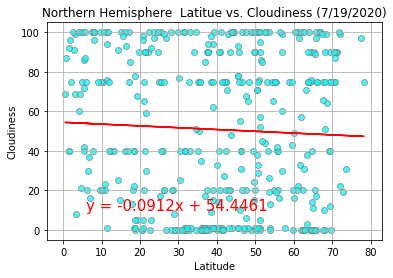

In [24]:
n_lat = northern_hemisphere_df ["Lat"]
n_cloud = northern_hemisphere_df ["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_cloud)
regress_values = n_lat* slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(n_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize = 15, color = "red")

plt.scatter(n_lat, n_cloud,color="aqua", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere  Latitue vs. Cloudiness (7/19/2020)")
plt.grid()
print(f" R-squared is {rvalue**2}")
plt.savefig("Figures/Regression_North_Lat_vs_Cloudiness.png")
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 R-squared is 0.027138931789868866


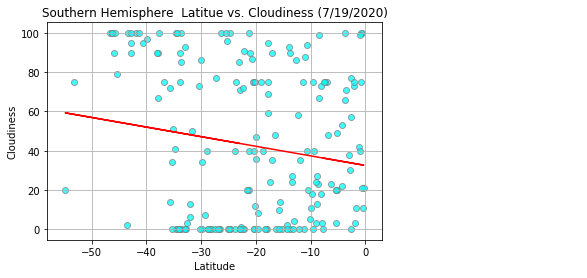

In [25]:
s_lat = southern_hemisphere_df ["Lat"]
s_cloud = southern_hemisphere_df ["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_cloud)
regress_values = s_lat* slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(s_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize = 15, color = "red")

plt.scatter(s_lat, s_cloud,color="aqua", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere  Latitue vs. Cloudiness (7/19/2020)")
plt.grid()
print(f" R-squared is {rvalue**2}")
plt.savefig("Figures/Regression_South_Lat_vs_Cloudiness.png")
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 R-squared is 0.02558984131214477


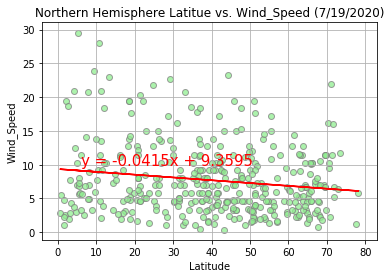

In [26]:
n_lat = northern_hemisphere_df ["Lat"]
n_wind = northern_hemisphere_df ["Wind_Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_wind)
regress_values = n_lat* slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(n_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize = 15, color = "red")

plt.scatter(n_lat, n_wind,color="lightgreen", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed")
plt.title("Northern Hemisphere Latitue vs. Wind_Speed (7/19/2020)")
plt.grid()
print(f" R-squared is {rvalue**2}")
plt.savefig("Figures/Regression_North_Lat_vs_Wind.png")
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

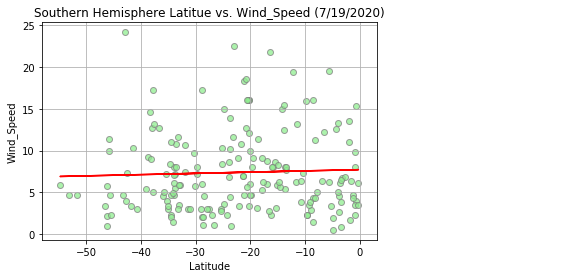

 R-squared is 0.0017094526191079207


<Figure size 432x288 with 0 Axes>

In [61]:
s_lat = southern_hemisphere_df ["Lat"]
s_wind = southern_hemisphere_df ["Wind_Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat,s_wind)
regress_values = s_lat* slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(s_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize = 15, color = "red")

plt.scatter(s_lat, s_wind,color="lightgreen", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed")
plt.title("Southern Hemisphere Latitue vs. Wind_Speed (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Regression_South_Lat_vs_Wind")
print(f" R-squared is {rvalue**2}")